In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sys import platform

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    path = '~/Documents/GitHub/f1-analytics/'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [10]:
data = pd.read_csv(path+'data/processed.csv')
merged = pd.read_csv(path+'data/merged.csv')

In [8]:
winners = merged.query('podium == 1 & season < 2022')
constructors = winners.constructor.value_counts()
constructors

mercedes        111
red_bull         28
ferrari          17
alphatauri        1
racing_point      1
alpine            1
mclaren           1
Name: constructor, dtype: int64

In [ ]:
constructors.sum()

In [19]:
points = data.query('season < 2022').groupby('constructor').agg({'driver_points_from': sum}).sort_values('driver_points_from', ascending=False)
points

,driver_points_from
constructor,
mercedes,5263.0
red_bull,3084.0
ferrari,3022.0
mclaren,910.0
williams,761.0
force_india,734.0
renault,459.0
toro_rosso,331.0
racing_point,283.0


In [20]:
points.driver_points_from.sum()

15752.0

[]

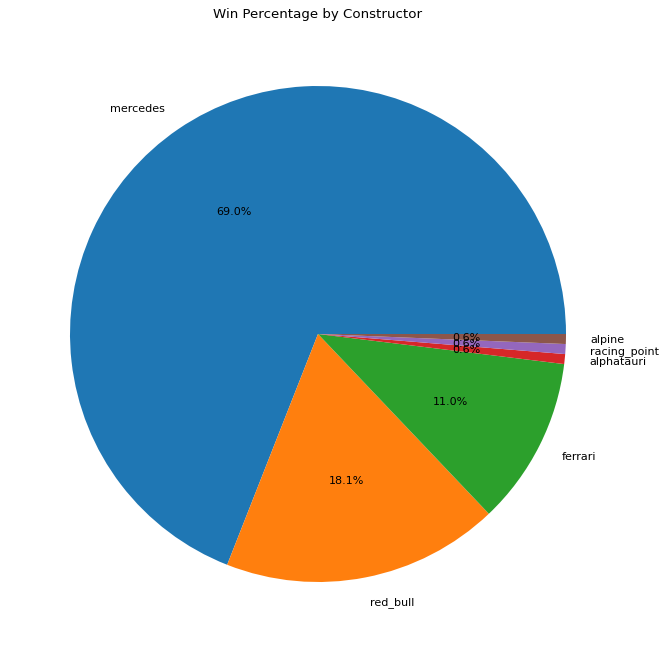

In [3]:
winners = merged.query('podium == 1')

constructors = winners.constructor.value_counts()

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 15)

axs.set_title('Percentage of wins by Constructor')
axs.pie(constructors.values, labels=constructors.index,autopct='%1.1f%%')
plt.plot()

[]

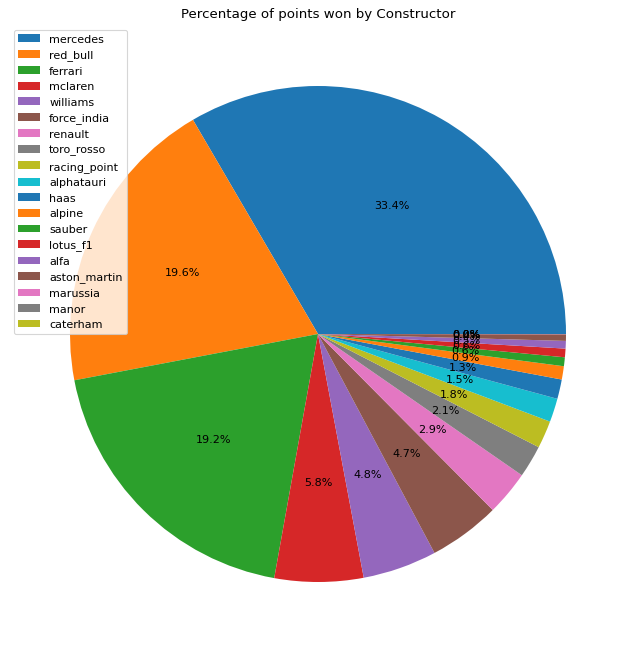

In [27]:
top_points = points

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 15)

axs.set_title('Percentage of points won by Constructor')
axs.pie(top_points.driver_points_from,autopct='%1.1f%%')
axs.legend(top_points.index, loc=2, prop={'size': 10})
plt.plot()

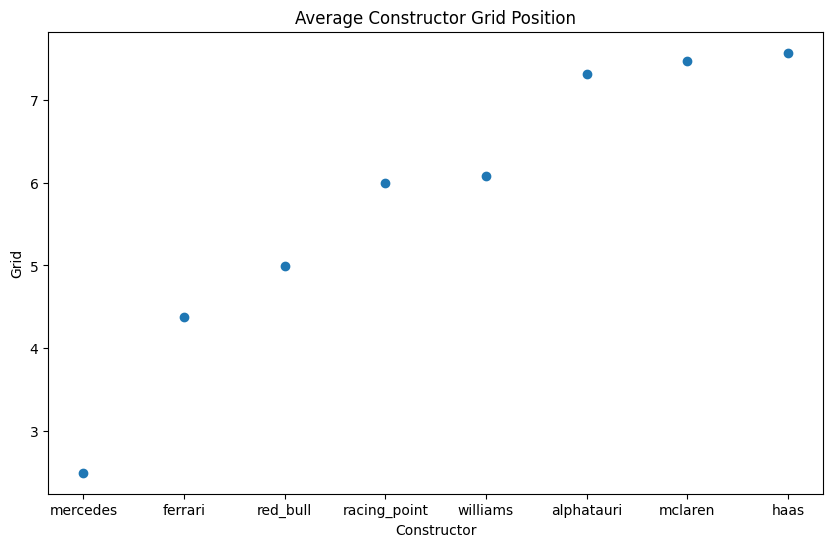

In [4]:
avg_constructor_grid = merged.groupby(
    'constructor'
    ).agg({
    'grid': mean
    }
).reset_index().sort_values('grid')

constructor_values = avg_constructor_grid[:8]

fig, axs = plt.subplots(1, dpi=100)
fig.set_size_inches(10, 6)

axs.set_title('Average Constructor Grid Position')
axs.set_xlabel('Constructor')
axs.set_ylabel('Grid')
axs.scatter(constructor_values.constructor, constructor_values.grid)
plt.show()